In [70]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from pathlib import Path

In [71]:
folder = Path ('C:/Upgrad Projects/ML2-M2-SVM')

In [72]:
# read training and test data
diabetes_train = pd.read_csv(folder/"diabetes_train.csv")
diabetes_train.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes,id
0,0.529042,-0.765617,-1.333478,-0.108916,-0.614735,0.130026,-0.084777,0,182
1,-1.027899,-0.733214,-0.053078,-0.299095,-0.892415,-0.325318,-0.967063,0,66
2,1.151819,-1.284075,0.587122,-0.299095,-0.715709,-0.538760,0.503413,0,35
3,-1.027899,-1.446093,1.387373,-0.013827,-0.976561,0.542681,-0.967063,0,140
4,-0.405123,-1.316478,-1.493528,-0.679452,-0.345469,-0.652596,-0.574936,0,305


In [73]:
diabetes_test = pd.read_csv(folder/"diabetes_test.csv")
diabetes_test.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,id
0,0.529042,-1.186864,-0.213128,-0.108916,-0.715709,-0.410695,-0.672968,234
1,1.774596,0.724948,1.387373,0.461620,0.075259,-0.396466,2.169953,265
2,-0.716511,1.599844,-0.213128,1.887960,3.558885,1.325303,-0.280841,207
3,0.217654,0.076876,-0.053078,-1.059810,-0.286567,-0.595678,1.385699,253
4,-0.716511,-0.895232,-0.373178,-1.535257,-0.993390,-1.919021,-0.574936,30


In [74]:
# create x and y train 
x_train = diabetes_train.iloc[:, :7]
y_train = diabetes_train.iloc[:, 7]

In [75]:

# tune the model

# specify the number of folds for k-fold CV
n_folds = 5

In [76]:
# specify range of parameters (C) as a list
params = {"C":[1, 2, 4, 5, 10, 100, 1000] }

In [77]:

# create SVC object
linear_model = SVC()

In [78]:
# set up grid search scheme
model_cv = GridSearchCV(estimator = linear_model, 
                         param_grid = params, 
                         scoring= 'accuracy', 
                         cv = n_folds, 
                         verbose = 1,
                         return_train_score=True) 

In [79]:
# fit the model on n_folds
model_cv.fit(x_train, y_train)

# store CV results in cv_results
cv_results = model_cv.cv_results_
pd.DataFrame(model_cv.cv_results_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.1s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002598,0.001194,0.000199,0.000399,1,{'C': 1},0.859375,0.714286,0.698413,0.709677,...,0.764331,0.069983,2,0.832,0.840637,0.840637,0.845238,0.829365,0.837576,0.005932
1,0.001983,0.000021,0.000191,0.000382,2,{'C': 2},0.859375,0.698413,0.714286,0.693548,...,0.757962,0.069528,4,0.848,0.868526,0.852590,0.869048,0.833333,0.854299,0.013432
2,0.002004,0.000019,0.000392,0.000480,4,{'C': 4},0.859375,0.714286,0.746032,0.677419,...,0.767516,0.070601,1,0.860,0.900398,0.864542,0.896825,0.861111,0.876575,0.018090
3,0.001801,0.000403,0.000393,0.000481,5,{'C': 5},0.843750,0.714286,0.730159,0.677419,...,0.764331,0.071633,2,0.868,0.908367,0.864542,0.908730,0.869048,0.883737,0.020313
4,0.002398,0.000504,0.000415,0.000508,10,{'C': 10},0.828125,0.730159,0.698413,0.693548,...,0.751592,0.055793,5,0.892,0.924303,0.904382,0.916667,0.900794,0.907629,0.011500
5,0.004399,0.000797,0.000397,0.000486,100,{'C': 100},0.765625,0.698413,0.634921,0.629032,...,0.700637,0.061717,6,0.984,0.988048,0.984064,0.988095,0.988095,0.986460,0.001983
6,0.005384,0.001008,0.000590,0.000482,1000,{'C': 1000},0.703125,0.666667,0.682540,0.629032,...,0.681529,0.032724,7,1.000,1.000000,0.996016,1.000000,1.000000,0.999203,0.001594


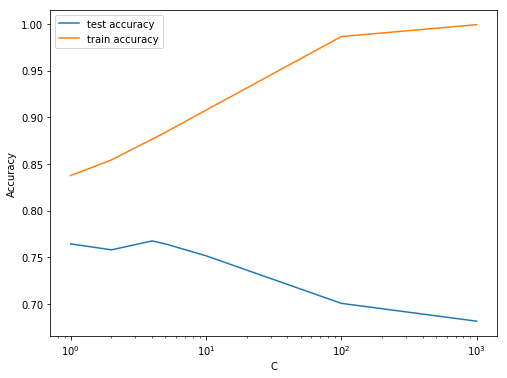

<Figure size 432x288 with 0 Axes>

In [80]:
# plot C versus train and test scores (code already written)
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()
plt.savefig(folder/'hyperparam_c.png') 

In [81]:
# best hyperparameter C and best (test) accuracy
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(best_score)
print(best_C)

0.767515923567
4


In [82]:
#  choose the best value of C 
C = best_C

In [83]:
# build a model with best value of C
linear_model = SVC(C=C)
linear_model.fit(x_train, y_train)

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
# make predictions
diabetes_test.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,id
0,0.529042,-1.186864,-0.213128,-0.108916,-0.715709,-0.410695,-0.672968,234
1,1.774596,0.724948,1.387373,0.461620,0.075259,-0.396466,2.169953,265
2,-0.716511,1.599844,-0.213128,1.887960,3.558885,1.325303,-0.280841,207
3,0.217654,0.076876,-0.053078,-1.059810,-0.286567,-0.595678,1.385699,253
4,-0.716511,-0.895232,-0.373178,-1.535257,-0.993390,-1.919021,-0.574936,30


In [85]:
predictions = linear_model.predict(diabetes_test.iloc[:, :7])

In [86]:
diabetes_pred = pd.DataFrame(diabetes_test)
diabetes_pred.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,id
0,0.529042,-1.186864,-0.213128,-0.108916,-0.715709,-0.410695,-0.672968,234
1,1.774596,0.724948,1.387373,0.461620,0.075259,-0.396466,2.169953,265
2,-0.716511,1.599844,-0.213128,1.887960,3.558885,1.325303,-0.280841,207
3,0.217654,0.076876,-0.053078,-1.059810,-0.286567,-0.595678,1.385699,253
4,-0.716511,-0.895232,-0.373178,-1.535257,-0.993390,-1.919021,-0.574936,30


In [87]:
diabetes_pred['prediction'] = predictions

In [88]:
diabetes_pred.head()
#predictions[:5]

# YOUR CODE ENDS HERE

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,id,prediction
0,0.529042,-1.186864,-0.213128,-0.108916,-0.715709,-0.410695,-0.672968,234,0
1,1.774596,0.724948,1.387373,0.461620,0.075259,-0.396466,2.169953,265,1
2,-0.716511,1.599844,-0.213128,1.887960,3.558885,1.325303,-0.280841,207,1
3,0.217654,0.076876,-0.053078,-1.059810,-0.286567,-0.595678,1.385699,253,0
4,-0.716511,-0.895232,-0.373178,-1.535257,-0.993390,-1.919021,-0.574936,30,0


In [89]:
# write columns id, predictions into the output file
d = pd.DataFrame({'id': diabetes_test['id'], 'Diabetes_Predicted': predictions})
print("\n", "d", "\n", d.head())

# write the output
#-d.to_csv('/code/output/diabetes_predictions.csv', sep=",")


 d 
     id  Diabetes_Predicted
0  234                   0
1  265                   1
2  207                   1
3  253                   0
4   30                   0
